In [1]:
import torch
print(torch.cuda.is_available())

True


In [1]:
import os
os.chdir(os.path.abspath('..'))

import torch
from scripts import model_loader
from model import pipeline

from PIL import Image
from transformers import CLIPTokenizer

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("data/vocab.json", merges_file="data/merges.txt")
model_file = "saved_checkpoints/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

h:\Documents\GitHub\stable-diffusion-from-scratch\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


h:\Documents\GitHub\stable-diffusion-from-scratch\venv\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


# Text-to-Image Architecture

100%|██████████| 50/50 [22:42<00:00, 27.26s/it]


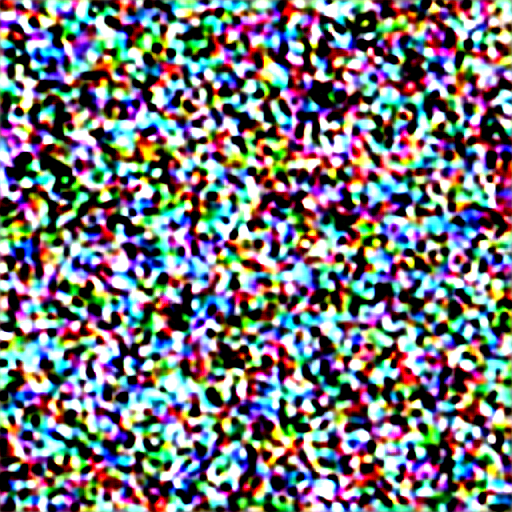

In [2]:
prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 8k resolution."
uncond_prompt = "" # You can use it as a negative prompt
do_cfg = True
cfg_scale = 7
sampler = "ddpm"

num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)

# Image-to-Image Architecture

In [3]:
input_image = None
image_path = "images/dog.jpg"
# input_image = Image.open(image_path)
strength = 0.8

sampler = "ddpm"
num_inference_steps = 50
seed = 42 # Lucky number

In [4]:
import os
print(os.getcwd())

h:\Documents\GitHub\stable-diffusion-from-scratch
